In [118]:
import matplotlib.pyplot as plt
import json
import numpy as np
from collections import defaultdict

In [119]:
def accuracy(truth, predictions):
    """
    Calculate the accuracy of predictions:
    Accuracy = (True Positives + True Negatives) / Total

    Parameters:
    truth (array-like): Actual ground truths (boolean or binary).
    predictions (array-like): Predictions made by the model (boolean or binary).

    Returns:
    float: The accuracy of the predictions.
    """
    truth = np.asarray(truth, dtype=bool)
    predictions = np.asarray(predictions, dtype=bool)
    return np.sum(truth == predictions) / len(truth)

In [120]:
def accuracy_groupby_confidence(data):
    confidence_dict = defaultdict(list)
    for item in data:
        confidence = item['confidence']
        confidence_dict[confidence].append(item)
    
    accuracy_dict = {}
    stat_result = {}
    for confidence, items in confidence_dict.items():
        truth = [item['label'] == 1 for item in items]
        predictions = [item['pred'] == "yes" for item in items]
        acc = accuracy(truth, predictions)
        if len(items) > 20:
            accuracy_dict[confidence] = acc

    keys = accuracy_dict.keys()
    keys = [key for key in keys if key is not None]
    keys_sorted = sorted(keys)
    sorted_dict = {key: accuracy_dict[key] for key in keys_sorted}

    return sorted_dict

In [121]:
def confidence_calibration_graph(prematch_acc, match_acc):
    x_gpt4o_mini = list(prematch_acc.keys())
    y_gpt4o_mini = list(prematch_acc.values())
    
    x_gpt4o = list(match_acc.keys())
    y_gpt4o = list(match_acc.values())
    
    perfect_calibration = np.linspace(0, 1, 100)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_gpt4o_mini, y_gpt4o_mini, '-o', label="GPT-4o-mini", color='darkblue', linewidth=1.5, alpha=0.8)
    plt.plot(x_gpt4o, y_gpt4o, '-o', label="GPT-4o", color='red', linewidth=1.5, alpha=0.8)
    plt.plot(perfect_calibration, perfect_calibration, '--', label="Perfect Calibration", color='black', alpha=0.5)
    
    plt.xlabel("Confidence", fontsize=11)
    plt.ylabel("Accuracy", fontsize=11)
    plt.title("Accuracy vs. Confidence", fontsize=12)
    plt.legend(loc='lower right', fontsize=10, frameon=False)
    
    plt.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.6)
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['left'].set_color('white')
    plt.gca().spines['bottom'].set_color('white')
    
    # Show plot
    plt.tight_layout()
    plt.show()

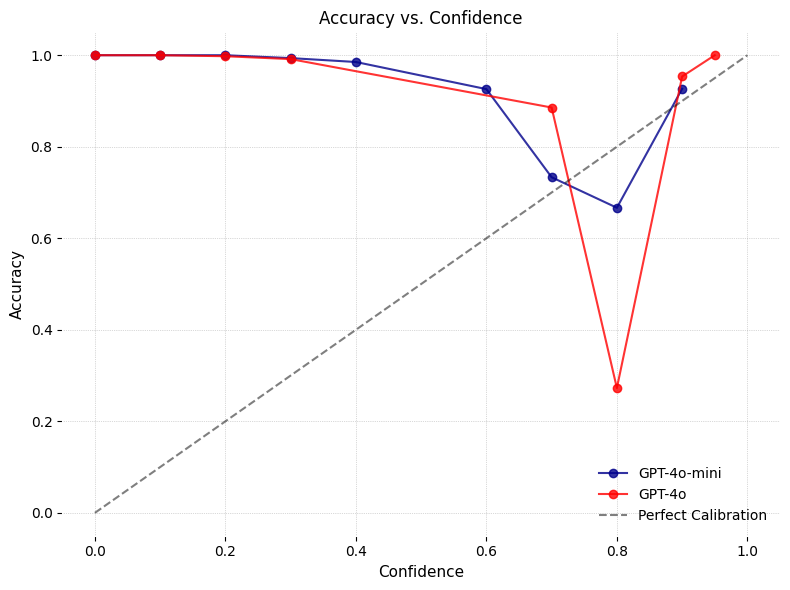

In [122]:
path_prematch = "2024-11-08-13-16-18-gpt-4o-mini.json"
path_match = "2024-11-08-13-16-18-gpt-4o.json"

with open(path_prematch, 'r') as file:
    data_prematch = json.load(file)
with open(path_match, 'r') as file:
    data_match = json.load(file)

result_prematch = data_prematch['results']
result_match = data_match['results']

prematch_acc = accuracy_groupby_confidence(result_prematch)
match_acc = accuracy_groupby_confidence(result_match)

confidence_calibration_graph(prematch_acc, match_acc)

dict_keys([0.8, 0.9, 0.7, 0.85, 0.95])
{0.9: 0.9375}


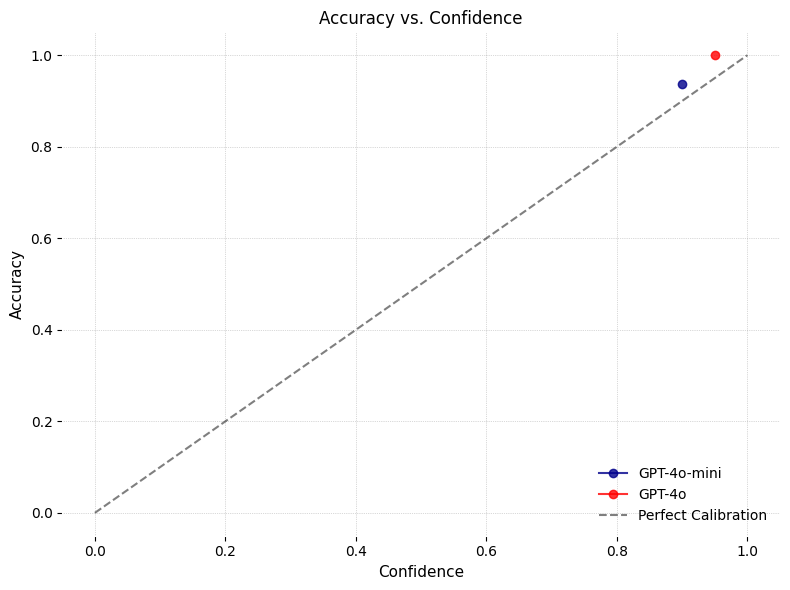

In [128]:
path_prematch = "gpt-4o-mini-abt_buy-2024-11-22-13-48-48.json"
path_match = "gpt-4o-abt_buy-2024-11-22-13-48-48.json"


with open(path_prematch, 'r') as file:
    data_prematch = json.load(file)
with open(path_match, 'r') as file:
    data_match = json.load(file)

result_prematch = data_prematch['results']
result_match = data_match['results']
confidence_dict = defaultdict(list)

prematch_acc = accuracy_groupby_confidence(result_prematch)
match_acc = accuracy_groupby_confidence(result_match)

confidence_calibration_graph(prematch_acc, match_acc)

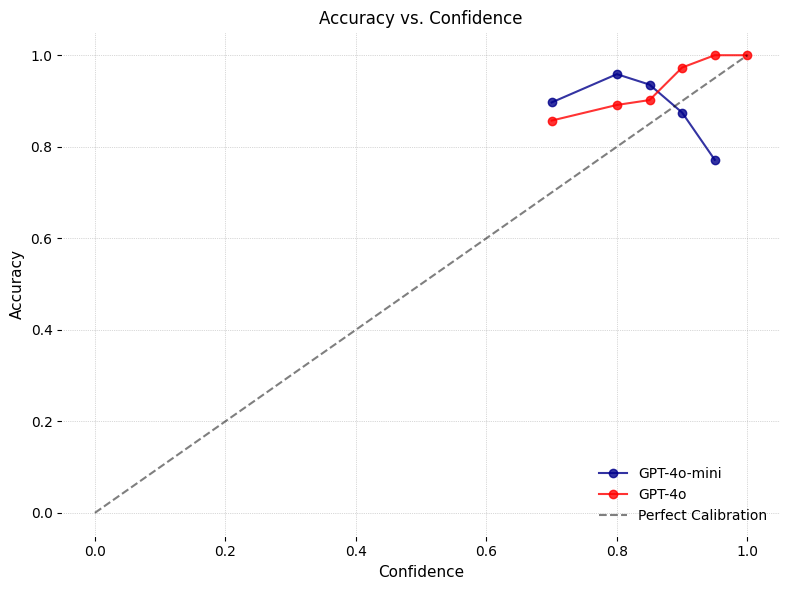

In [130]:
path_prematch = "gpt-4o-mini-abt_buy-2024-11-22-16-36-02.json"
path_match = "gpt-4o-abt_buy-2024-11-22-16-36-02.json"


with open(path_prematch, 'r') as file:
    data_prematch = json.load(file)
with open(path_match, 'r') as file:
    data_match = json.load(file)

result_prematch = data_prematch['results']
result_match = data_match['results']
confidence_dict = defaultdict(list)

prematch_acc = accuracy_groupby_confidence(result_prematch)
match_acc = accuracy_groupby_confidence(result_match)

confidence_calibration_graph(prematch_acc, match_acc)